In [1]:
from google.colab import files
uploaded = files.upload()

Saving real_estate_data.csv to real_estate_data.csv


Output()

Output()

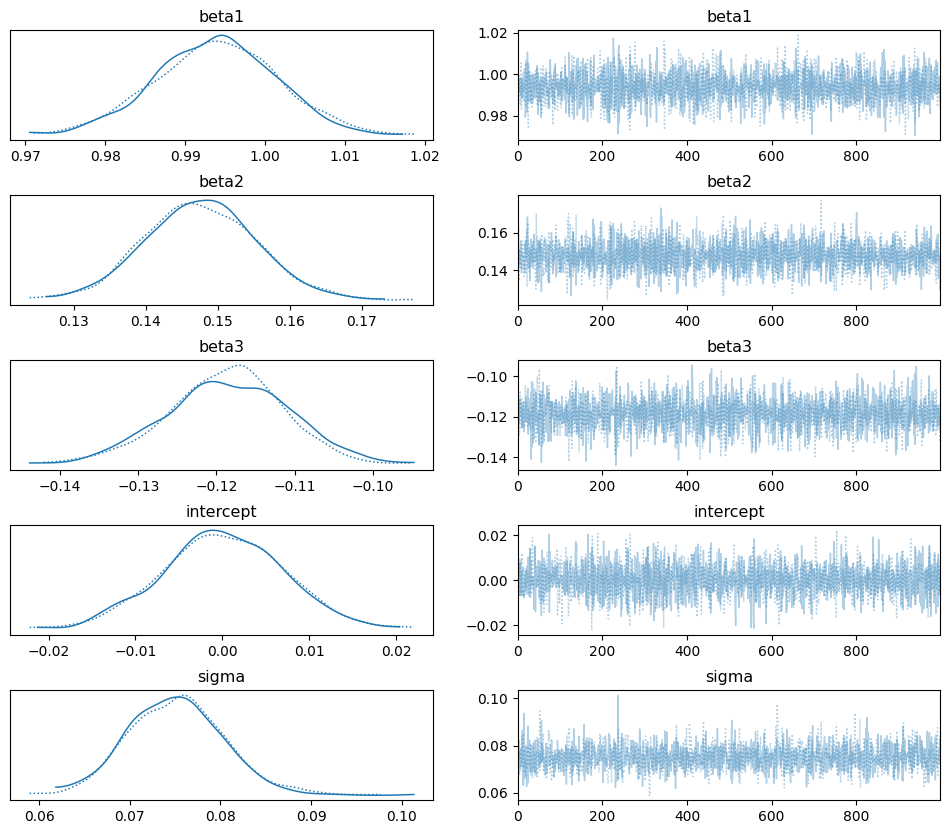

            mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta1      0.994  0.007   0.979    1.007        0.0      0.0    3423.0   
beta2      0.148  0.008   0.134    0.163        0.0      0.0    2939.0   
beta3     -0.119  0.008  -0.134   -0.104        0.0      0.0    2830.0   
intercept  0.000  0.007  -0.013    0.013        0.0      0.0    3325.0   
sigma      0.075  0.005   0.066    0.085        0.0      0.0    2171.0   

           ess_tail  r_hat  
beta1        1579.0    1.0  
beta2        1661.0    1.0  
beta3        1686.0    1.0  
intercept    1720.0    1.0  
sigma        1472.0    1.0  


In [3]:
import pandas as pd
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("real_estate_data.csv")

x1 = data["Surface_area"].values
x2 = data["Rooms"].values
x3 = data["Distance_to_center"].values
y = data["Price"].values

# normalizare date
x1_norm = (x1 - np.mean(x1)) / np.std(x1)
x2_norm = (x2 - np.mean(x2)) / np.std(x2)
x3_norm = (x3 - np.mean(x3)) / np.std(x3)
y_norm = (y - np.mean(y)) / np.std(y)

with pm.Model() as model:
    beta1 = pm.Normal("beta1", mu=0, sigma=1)
    beta2 = pm.Normal("beta2", mu=0, sigma=1)
    beta3 = pm.Normal("beta3", mu=0, sigma=1)
    intercept = pm.Normal("intercept", mu=0, sigma=1)

    mu = intercept + beta1 * x1_norm + beta2 * x2_norm + beta3 * x3_norm

    sigma = pm.HalfNormal("sigma", sigma=1)
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y_norm)

    trace = pm.sample(1000, tune=1000, return_inferencedata=True)

pm.plot_trace(trace)
plt.subplots_adjust(hspace=0.5)
plt.show()

summary = pm.summary(trace)
print(summary)


Conform analizei, observam ca beta1 (Surface area) are media 0.994, cu un interval de credibilitate de 94% intre 0.979 și 1.007 este coeficientul cel mai mare al modelului nostru, deci constituie factorul cel mai important.

Pentru beta2 (Rooms), avem media 0.148, cu un interval de credibilitate de 94% intre 0.134 și 0.163, deci putem spune ca numarul de camere influenteaza pozitiv pretul, dar efectul este mult mai mic decât cel al suprafetei utile.

Iar beta3 (Distance_to_center),cu  media -0.119 si un interval de credibilitate de 94% intre -0.134 si -0.104, influenteaza negativ pretul, deci cu cat apartamentul este mai departe de centru, cu atat pretul lui scade.